# 学习资源

* UCL公开课 强化学习 没有字幕 https://www.bilibili.com/video/av66110898?from=search&seid=10145644525186290058
* 博客https://www.cnblogs.com/pinard/p/9385570.html

# 强化学习基础
https://www.cnblogs.com/pinard/p/9385570.html

## RL VS 监督学习
* 没有label，只有奖励值。奖励值和监督学习的输出值不一样，它不是事先给出的，而是延后给出的，比如上面的例子里走路摔倒了才得到大脑的奖励值。强化学习的每一步与时间顺序前后关系紧密。而监督学习的训练数据之间一般都是独立的，没有这种前后的依赖关系。

## RL VS 非监督学习
再来看看强化学习和非监督学习的区别。也还是在奖励值这个地方。非监督学习是没有输出值也没有奖励值的，它只有数据特征。同时和监督学习一样，数据之间也都是独立的，没有强化学习这样的前后依赖关系。

# 强化学习要素
* 第一个是环境的状态𝑆, 
t时刻环境的状态𝑆𝑡。是它的环境状态集中某一个状态。

* 第二个是个体的动作𝐴
, t时刻个体采取的动作𝐴𝑡是它的动作集中某一个动作。

* 第三个是环境的奖励𝑅
,t时刻个体在状态𝑆𝑡采取的动作𝐴𝑡对应的奖励𝑅𝑡+1会在t+1时刻得到。

* 下面是稍复杂一些的模型要素。

* 第四个是个体的策略(policy)𝜋
,它代表个体采取动作的依据，即个体会依据策略𝜋来选择动作。最常见的策略表达方式是一个条件概率分布𝜋(𝑎|𝑠), 即在状态𝑠时采取动作𝑎的概率。即$$𝜋(𝑎|𝑠)=𝑃(𝐴𝑡=𝑎|𝑆𝑡=𝑠).$$
此时概率大的动作被个体选择的概率较高。

* 第五个是个体在策略𝜋和状态𝑠时，采取行动后的价值（value），
    * 动作价值函数$q_\pi(s, a)$  
    表示在状态s下，执行动作a后的价值
    $$q_\pi(s, a)=E_\pi(G_t|S_t=s, A_t=a)\\=E_\pi[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_t=s, A_t=a]$$
    * 状态价值函数  
    一般用$𝑣_𝜋(𝑠)$表示。  
这个价值一般是一个期望函数。虽然当前动作会给一个延时奖励𝑅𝑡+1,但是光看这个延时奖励是不行的，因为当前的延时奖励高，不代表到了t+1,t+2,...时刻的后续奖励也高。比如下象棋，我们可以某个动作可以吃掉对方的车，这个延时奖励是很高，但是接着后面我们输棋了。此时吃车的动作奖励值高但是价值并不高。因此我们的价值要综合考虑当前的延时奖励和后续的延时奖励。价值函数$𝑣_𝜋(𝑠)$一般可以表示为下式，不同的算法会有对应的一些价值函数变种，但思路相同。
$$v_\pi(s)=E_\pi(G_t|S_t=s)\\=E_\pi[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_t=s]\\=\sum_{a\in A}\pi(a|s)q_\pi(s, a)$$
    也就是说，状态价值函数是所有动作价值函数基于策略𝜋的期望。通俗说就是某状态下所有状态动作价值乘以该动作出现的概率，最后求和，就得到了对应的状态价值
* 其中𝛾是第六个模型要素，即奖励衰减因子，在[0，1]之间。如果为0，则是贪婪法，即价值只由当前延时奖励决定，如果是1，则所有的后续状态奖励和当前奖励一视同仁。大多数时候，我们会取一个0到1之间的数字，即当前延时奖励的权重比后续奖励的权重大。

* 第七个是环境的状态转化模型，可以理解为一个概率状态机，它可以表示为一个概率模型，即在状态𝑠下采取动作𝑎,转到下一个状态𝑠′的概率，表示为$𝑃^𝑎_{𝑠𝑠′}$。

* 第八个是探索率𝜖，这个比率主要用在强化学习训练迭代过程中，由于我们一般会选择使当前轮迭代价值最大的动作，但是这会导致一些较好的但我们没有执行过的动作被错过。因此我们在训练选择最优动作时，会有一定的概率𝜖不选择使当前轮迭代价值最大的动作，而选择其他的动作。

以上8个就是强化学习模型的基本要素了。当然，在不同的强化学习模型中，会考虑一些其他的模型要素，或者不考虑上述要素的某几个，但是这8个是大多数强化学习模型的基本要素。

# 马尔科夫决策过程(Markov Decision Process，以下简称MDP)
https://www.cnblogs.com/pinard/p/9426283.html

## MDP的价值函数与贝尔曼方程
在𝑡时刻的状态𝑆𝑡和𝑡+1时刻的状态𝑆𝑡+1是满足递推关系的
$$v_\pi(s)=E_\pi(G_t|S_t=s)\\=E_\pi[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_t=s]\\=E_\pi(R_{t+1}+\gamma G_{t+1}|S_t=s)\\=E_\pi(R_{t+1}+\gamma v_\pi(S_{t+1})|S_t=s)$$
这个递推式子我们一般将它叫做贝尔曼方程。这个式子告诉我们，一个状态的价值由该状态的奖励以及后续状态价值按一定的衰减比例联合组成。

同样的方法，我们可以得到动作价值函数𝑞𝜋(𝑠,𝑎)的贝尔曼方程：
$$q_\pi(s, a)=E_\pi(G_t|S_t=s, A_t=a)\\=E_\pi[R_{t+1}+\gamma q_\pi(S_{t+1},A_{t+1})|S_t=s, A_t=a]$$

## 状态价值函数与动作价值函数的递推关系
利用上贝尔曼方程，我们也很容易从状态价值函数$𝑣_𝜋(𝑠)$表示动作价值函数$𝑞_𝜋(𝑠,𝑎)$，即：
$$q_\pi(s,a)=R^a_s+\gamma \sum_{s'\in S}P^a_{ss'}v_\pi{s'}$$
通俗说就是状态动作价值有两部分相加组成，第一部分是即时奖励，第二部分是环境所有可能出现的下一个状态的概率乘以该下一状态的状态价值，最后求和，并加上衰减。

## 最优价值函数
解决强化学习问题意味着要寻找一个最优的策略让个体在与环境交互过程中获得始终比其它策略都要多的收获，这个最优策略我们可以用 $𝜋∗$表示。一旦找到这个最优策略$𝜋∗$，那么我们就解决了这个强化学习问题。一般来说，比较难去找到一个最优策略，但是可以通过比较若干不同策略的优劣来确定一个较好的策略，也就是局部最优解。

如何比较策略的优劣呢？一般是通过对应的价值函数来比较的，也就是说，寻找较优策略可以通过寻找较优的价值函数来完成。可以定义最优状态价值函数是所有策略下产生的众多状态价值函数中的最大者，即：
$$v_*(s)=max_\pi v_\pi(s)$$
同理也可以定义最优动作价值函数是所有策略下产生的众多动作状态价值函数中的最大者，即：
$$q_*(s, a)=max_\pi q_\pi(s,a)$$
对于最优的策略，基于动作价值函数我们可以定义为：
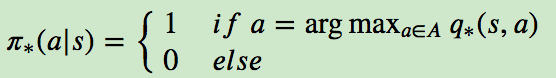
可以理解为选择使的$q_*(s, a)$最优的动作

只要我们找到了最大的状态价值函数或者动作价值函数，那么对应的策略𝜋∗就是我们强化学习问题的解。同时，利用状态价值函数和动作价值函数之间的关系，我们也可以得到:
$$v_*(s)=max_aq_*(s,a)$$
注：本来v是所有的动作下q的和，现在只选取一个动作a，其余动作的概率都为0，所以。。。

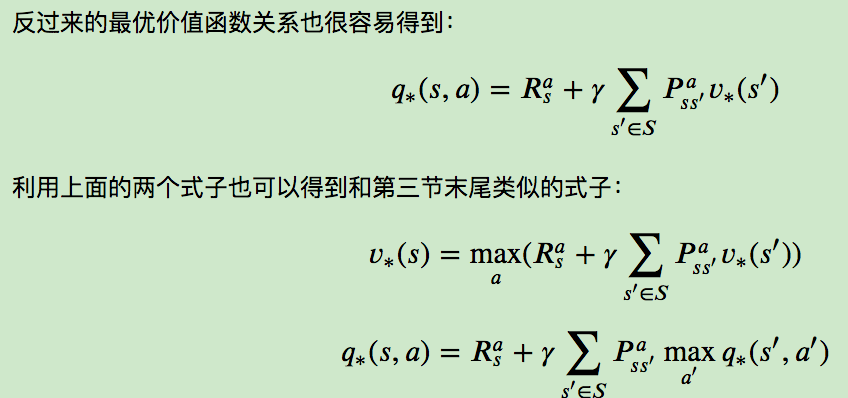

## MDP实例
上面的公式有点多，需要一些时间慢慢消化，这里给出一个UCL讲义上实际的例子，首先看看具体我们如何利用给定策略来计算价值函数。
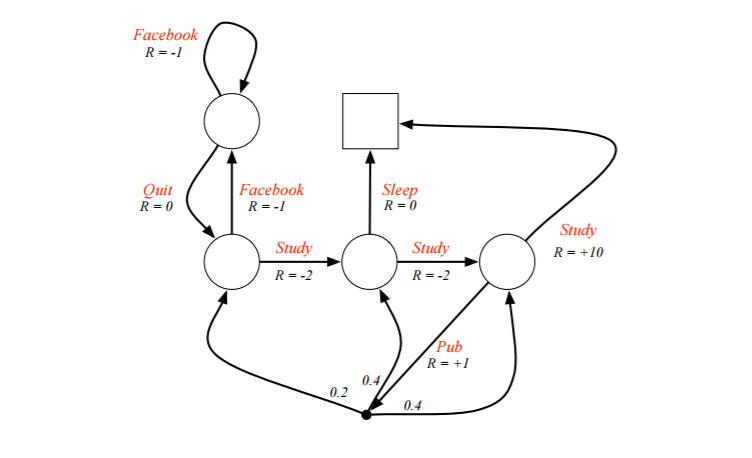

* 状态集S  
四个圆圈：左上，左下，中下，右下，方框是终态  
例子是一个学生学习考试的MDP。里面左下那个圆圈位置是起点，方框那个位置是终点。

* 动作集A
上面的动作有study, pub, facebook, quit, sleep，每个状态动作对应的即时奖励R已经标出来了。

我们的目标是找到最优的动作价值函数或者状态价值函数，进而找出最优的策略。

为了方便，我们假设衰减因子𝛾=1；除了终态以外，每个状态都有两个动作可以出发，假设在状态s下发生两个动作的概率相同，即𝜋(𝑎|𝑠)=0.5。

对于终点方框位置，由于其没有下一个状态，也没有当前状态的动作，因此其状态价值函数为0。

对于其余四个状态，我们依次定义其价值为𝑣1,𝑣2,𝑣3,𝑣4， 分别对应左上，左下，中下，右下位置的圆圈。我们基于$$𝑣_𝜋(𝑠)=\sum_{𝑎∈𝐴}𝜋(𝑎|𝑠)(𝑅^𝑎_𝑠+𝛾\sum_{𝑠′∈𝑆}𝑃^𝑎_{𝑠𝑠′}𝑣_𝜋(𝑠′))$$计算所有的状态价值函数。可以列出一个方程组。

* 对于𝑣1位置，我们有：𝑣1=0.5∗(−1+𝑣1)+0.5∗(0+𝑣2)

* 对于𝑣2位置，我们有：𝑣2=0.5∗(−1+𝑣1)+0.5∗(−2+𝑣3)

* 对于𝑣3位置，我们有：𝑣3=0.5∗(0+0)+0.5∗(−2+𝑣4)

* 对于𝑣4位置，我们有：𝑣4=0.5∗(10+0)+0.5∗(1+0.2∗𝑣2+0.4∗𝑣3+0.4∗𝑣4)

解出这个方程组可以得到𝑣1=−2.3,𝑣2=−1.3,𝑣3=2.7,𝑣4=7.4, 即每个状态的价值函数如下图：
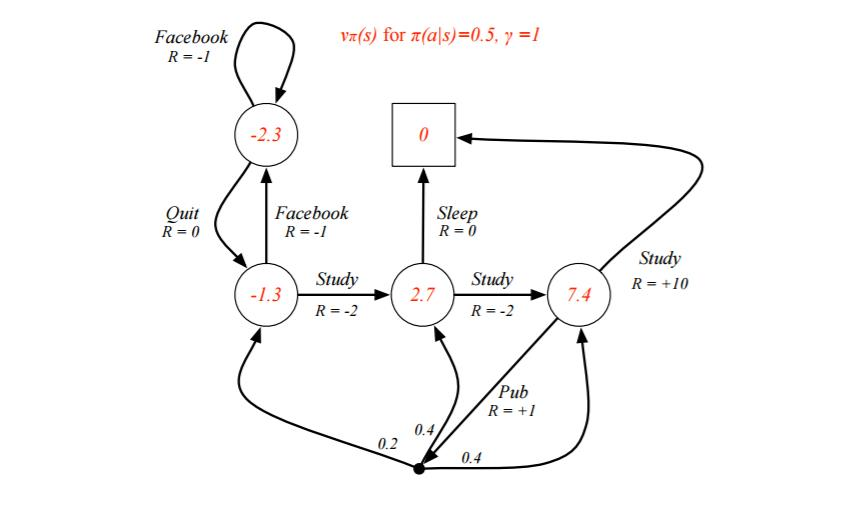

上面我们固定了策略𝜋(𝑎|𝑠),虽然求出了每个状态的状态价值函数，但是却并不一定是最优价值函数。那么如何求出最优价值函数呢？这里由于状态机简单，求出最优的状态价值函数$𝑣_∗(𝑠)$或者动作价值函数$𝑞_∗(𝑠,𝑎)$比较容易。

我们这次以动作价值函数$𝑞_∗(𝑠,𝑎)$来为例求解。首先终点方框处的好求。
$$𝑞_∗(𝑠3,𝑠𝑙𝑒𝑒𝑝)=0,𝑞_∗(𝑠4,𝑠𝑡𝑢𝑑𝑦)=10$$

接着我们就可利用$$𝑞_∗(𝑠,𝑎)=𝑅^𝑎_𝑠+𝛾\sum_{𝑠′∈𝑆}𝑃^𝑎_{𝑠𝑠′}max_{𝑎′}𝑞_∗(𝑠′,𝑎′)$$
列方程组求出所有的$𝑞_∗(𝑠,𝑎)$。

有了所有的$𝑞_∗(𝑠,𝑎)$,利用$𝑣_∗(𝑠)=max_𝑎𝑞_∗(𝑠,𝑎)$就可以求出所有的$𝑣_∗(𝑠)$。最终求出的所有$𝑣_∗(𝑠)$和$𝑞_∗(𝑠,𝑎)$如下图：